In [101]:
import pandas as pd

dataset = "../../data/countries.csv"
df = pd.read_csv(dataset, sep=";")
df.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,"tld,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,AD,AND,468.0,Andorra la Vella,EU,EUR,Euro,NaN,AN,3041565,ca,Andorra,"ES,FR",20,376,84000,AD###,^(?:AD)*(\d{3})$,".ad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
1,AE,ARE,82880.0,Abu Dhabi,AS,AED,Dirham,NaN,AE,290557,"ar-AE,fa,en,hi,ur",United Arab Emirates,"SA,OM",784,971,4975593,NaN,NaN,".ae,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
2,AF,AFG,647500.0,Kabul,AS,AFN,Afghani,NaN,AF,1149361,"fa-AF,ps,uz-AF,tk",Afghanistan,"TM,CN,IR,TJ,PK,UZ",4,93,29121286,NaN,NaN,".af,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
3,AG,ATG,443.0,St. John's,NaN,XCD,Dollar,NaN,AC,3576396,en-AG,Antigua and Barbuda,NaN,28,+1-268,86754,NaN,NaN,".ag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
4,AI,AIA,102.0,The Valley,NaN,XCD,Dollar,NaN,AV,3573511,en-AI,Anguilla,NaN,660,+1-264,13254,NaN,NaN,".ai,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"


In [102]:
print(df.isnull().sum())
df.shape

alpha_2                                      1
alpha_3                                      0
area                                         0
capital                                      6
continent                                   42
currency_code                                1
currency_name                                1
eqivalent_fips_code                        251
fips                                         3
geoname_id                                   0
languages                                    3
name                                         0
neighbours                                  87
numeric                                      0
phone                                        5
population                                   0
postal_code_format                          98
postal_code_regex                          100
tld,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,      0
dtype: int64


(252, 19)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   alpha_2                                  251 non-null    object 
 1   alpha_3                                  252 non-null    object 
 2   area                                     252 non-null    float64
 3   capital                                  246 non-null    object 
 4   continent                                210 non-null    object 
 5   currency_code                            251 non-null    object 
 6   currency_name                            251 non-null    object 
 7   eqivalent_fips_code                      1 non-null      object 
 8   fips                                     249 non-null    object 
 9   geoname_id                               252 non-null    int64  
 10  languages                                249 non-n

In [104]:
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


Text(0.5, 1.0, 'Matriz de Correlación')

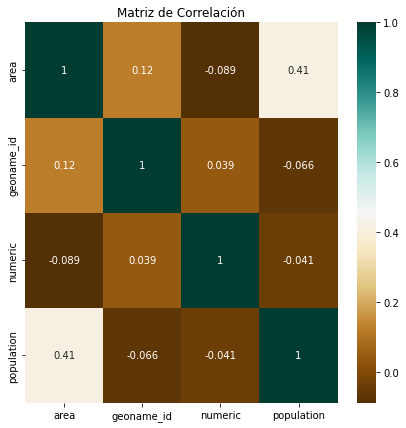

In [105]:
import matplotlib.pyplot as plt
import seaborn as sea

correlation = df.corr()
plt.figure(figsize=(7,7))
ax = sea.heatmap(correlation, annot=True, cmap='BrBG')
plt.title("Matriz de Correlación")

In [106]:
import numpy as np

df_clean = df.replace(np.nan, '')
df_clean.isnull().sum()

alpha_2                                    0
alpha_3                                    0
area                                       0
capital                                    0
continent                                  0
currency_code                              0
currency_name                              0
eqivalent_fips_code                        0
fips                                       0
geoname_id                                 0
languages                                  0
name                                       0
neighbours                                 0
numeric                                    0
phone                                      0
population                                 0
postal_code_format                         0
postal_code_regex                          0
tld,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,    0
dtype: int64

In [107]:
df_spanish_lang = df_clean[df_clean['languages'].str.contains('es')]
df_spanish_lang.head()

,alpha_2,alpha_3,area,capital,continent,currency_code,currency_name,eqivalent_fips_code,fips,geoname_id,languages,name,neighbours,numeric,phone,population,postal_code_format,postal_code_regex,"tld,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
9,AR,ARG,2766890.0,Buenos Aires,SA,ARS,Peso,,AR,3865483,"es-AR,en,it,de,fr,gn",Argentina,"CL,BO,UY,PY,BR",32,54,41343201,@####@@@,"^[A-Z]?\d{4}[A-Z]{0,3}$",".ar,,,,,,,,,,,,,,,,,,,,,,,,,,"
13,AW,ABW,193.0,Oranjestad,,AWG,Guilder,,AA,3577279,"nl-AW,es,en",Aruba,,533,297,71566,,,".aw,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
28,BO,BOL,1098580.0,Sucre,SA,BOB,Boliviano,,BL,3923057,"es-BO,qu,ay",Bolivia,"PE,CL,PY,BR,AR",68,591,9947418,,,".bo,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
30,BR,BRA,8511965.0,Brasilia,SA,BRL,Real,,BR,3469034,"pt-BR,es,en,fr",Brazil,"SR,PE,BO,UY,GY,PY,GF,VE,CO,AR",76,55,201103330,#####-###,^\d{5}-\d{3}$,".br,,,,,,,,,,,,,,,,,,,,,,,,"
36,BZ,BLZ,22966.0,Belmopan,,BZD,Dollar,,BH,3582678,"en-BZ,es",Belize,"GT,MX",84,501,314522,,,".bz,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"


<AxesSubplot:xlabel='alpha_3'>

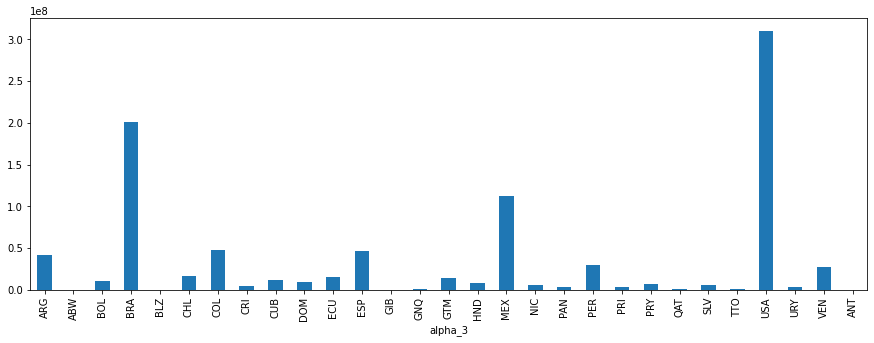

In [108]:
df_spanish_lang.set_index('alpha_3')['population'].plot(kind='bar', figsize=(15,5))

<AxesSubplot:xlabel='year'>

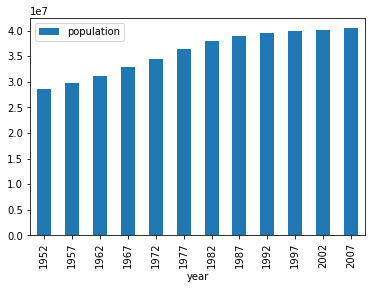

In [109]:
dataset_countries_2 = '../../data/countries-2.csv'
df_pop = pd.read_csv(dataset_countries_2)

df_pop_es = df_pop[df_pop["country"] == "Spain"]

df_pop_es[['year', 'population']].plot(x='year', kind='bar')


<AxesSubplot:xlabel='year'>

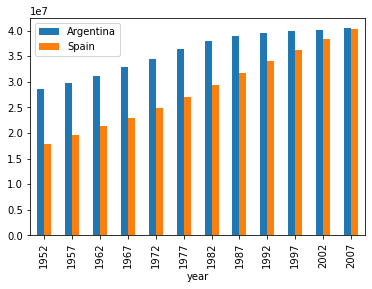

In [110]:
df_pop_arg = df_pop[df_pop["country"] == "Argentina"]

# df_pop_arg_es = pd.merge(df_pop_arg, df_pop_es, on="year")

pop_es = df_pop_es['population'].values
pop_ar = df_pop_arg['population'].values
years = df_pop_es['year']
df_pop_arg_es = pd.DataFrame(
    {"Argentina": pop_es, "Spain": pop_ar}, index=years)

df_pop_arg_es.plot(kind='bar')






In [111]:
filename = '../../data/prima-indians-diabetes.csv'
names = ['Preg', 'Plas', 'Pres', 'Skin', 'Test', 'Mass', 'Pedi', 'Age', 'Class']

df = pd.read_csv(filename, names=names)
array = df.values

x = array[:,:8]
y = array[:,8]

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler= MinMaxScaler(feature_range=(0,1))
np.set_printoptions(precision=3)
rescaled_x = scaler.fit_transform(x)
rescaled_x

array([[0.353, 0.744, 0.59 , ..., 0.501, 0.234, 0.483],
       [0.059, 0.427, 0.541, ..., 0.396, 0.117, 0.167],
       [0.471, 0.92 , 0.525, ..., 0.347, 0.254, 0.183],
       ...,
       [0.294, 0.608, 0.59 , ..., 0.39 , 0.071, 0.15 ],
       [0.059, 0.633, 0.492, ..., 0.449, 0.116, 0.433],
       [0.059, 0.467, 0.574, ..., 0.453, 0.101, 0.033]])